Use Case 9
==========

Problem Definition:
-------------------

A climate scientist wishes to analyse potential correlations between *Ozone* and *Cloud* ECVs.

Required Toolbox Features:
--------------------------

* Access to and ingestion of ESA CCI Ozone and Cloud data (Atmosphere Mole Content of Ozone and Cloud Cover)
* Geometric adjustments (coregistration)
* Spatial (point, polygon) and temporal subsetting
* Visualisation of time series
* Correlation analysis, scatter-plot of correlation statistics, saving of image and correlation statistics on disk (format options)

Ingest data and create datasets
-------------------------------

In [1]:
from cate.core.ds import DATA_STORE_REGISTRY
from cate.util import ConsoleMonitor
import cate.ops as ops

In [2]:
monitor = ConsoleMonitor()

In [3]:
data_store = DATA_STORE_REGISTRY.get_data_store('esa_cci_odp')

In [4]:
data_store.query('ozone')

[esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1,
 esacci.OZONE.day.L3S.TC.SCIAMACHY.Envisat.MERGED.fv0100.r1,
 esacci.OZONE.day.L3S.TC.GOME-2.Metop-A.MERGED.fv0100.r1,
 esacci.OZONE.day.L3S.TC.GOME.ERS-2.MERGED.fv0100.r1]

In [5]:
data_store.query('cloud')

[esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-15.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-18.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-16.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3S.CLD_PRODUCTS.MODIS.multi-platform.MODIS_MERGED.1-0.r1,
 esacci.CLOUD.mon.L3S.CLD_PRODUCTS.AVHRR.multi-platform.AVHRR_MERGED.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-18.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-16.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-15.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.mul

In [6]:
cc = ops.open_dataset('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1',
                      '2007-01-01',
                      '2007-12-31', sync=True, monitor=monitor)

In [7]:
oz = ops.open_dataset('esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1',
                      '2007-01-01',
                      '2007-12-21', sync=True, monitor=monitor)

Filter datasets to select the desired variables
-----------------------------------------------

In [8]:
cc_tot = ops.select_var(cc, 'cc_total')
oz_tot = ops.select_var(oz, 'O3_du_tot')

In [9]:
oz_tot

<xarray.Dataset>
Dimensions:       (air_pressure: 17, lat: 180, layers: 16, lon: 360, time: 12)
Coordinates:
  * lon           (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * lat           (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * layers        (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * air_pressure  (air_pressure) float32 1013.0 446.05 196.35 113.63 65.75 ...
  * time          (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01 ...
Data variables:
    O3_du_tot     (time, lat, lon) float32 260.176 264.998 267.394 265.048 ...

Plot the first time slice of the dataset

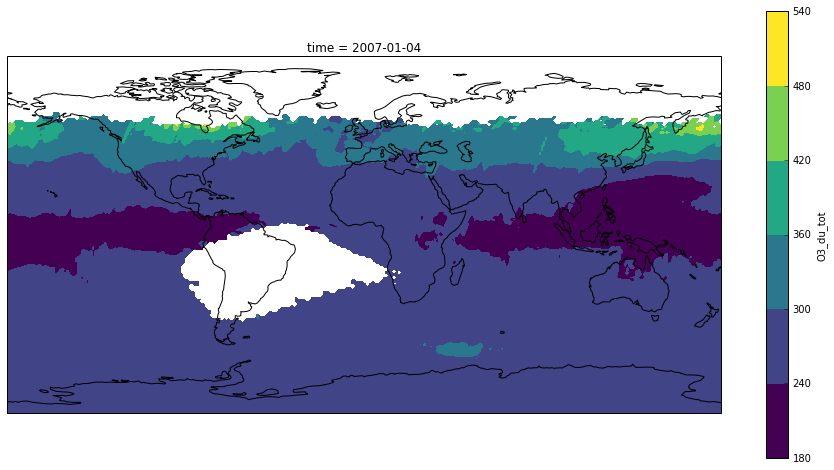

In [10]:
%matplotlib inline
ops.plot_map(oz_tot, var='O3_du_tot', time=0, file='/home/ccitbx/Desktop/fig1.png')

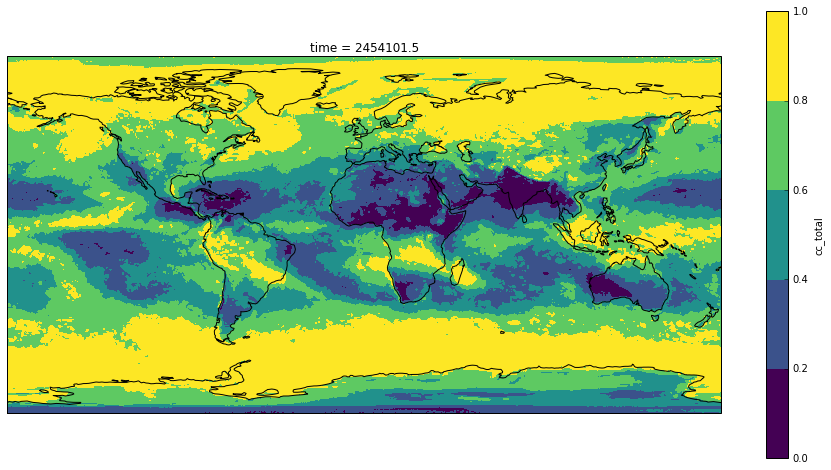

In [11]:
ops.plot_map(cc_tot, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig2.png')

Co-register datasets by resampling
----------------------------------

In [12]:
print(cc_tot['cc_total'].shape)
print(oz_tot['O3_du_tot'].shape)

(12, 360, 720)
(12, 180, 360)


In [13]:
cc_tot_res = ops.coregister(oz_tot, cc_tot)

In [14]:
print(cc_tot_res['cc_total'].shape)
print(oz_tot['O3_du_tot'].shape)

(12, 180, 360)
(12, 180, 360)


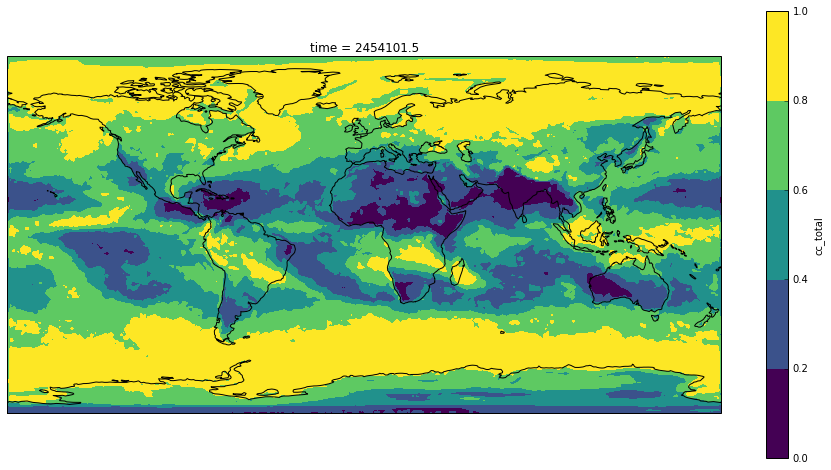

In [15]:
ops.plot_map(cc_tot_res, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig3.png')

Select the desired spatial region
---------------------------------

In [18]:
africa = '-20.0, -40.0, 60.0, 40.0'
# 'lon_min, lat_min, lon_max, lat_max'
cc_tot_africa = ops.subset_spatial(cc_tot_res, africa)
oz_tot_africa = ops.subset_spatial(oz_tot, africa)

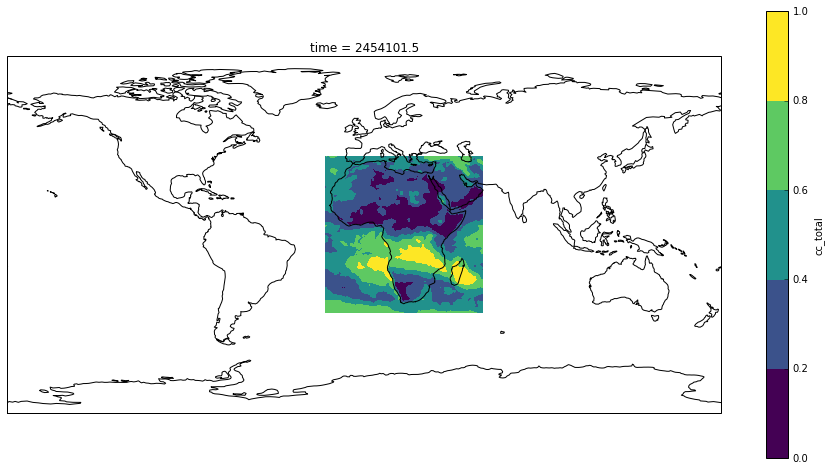

In [19]:
ops.plot_map(cc_tot_africa, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig4.png')

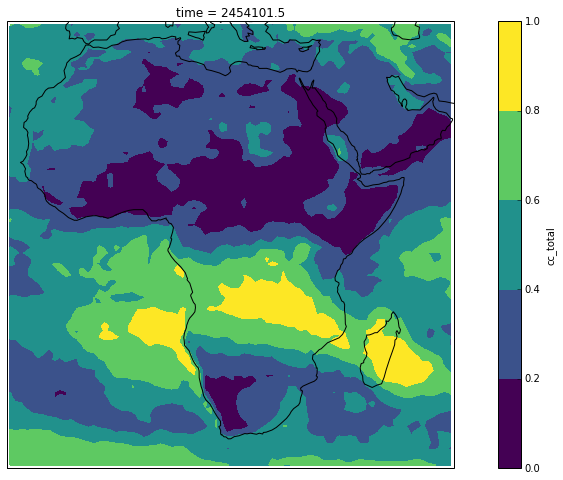

In [20]:
ops.plot_map(cc_tot_africa, var='cc_total', time=0, 
                 region=africa, file='/home/ccitbx/Desktop/fig5.png')

Select the desired temporal region
----------------------------------

In [75]:
cc_tot_africa.time.values

array([ 2454101.5,  2454132.5,  2454160.5,  2454191.5,  2454221.5,
        2454252.5,  2454282.5,  2454313.5,  2454344.5,  2454374.5,
        2454405.5,  2454435.5])

In [89]:
from jdcal import jd2gcal, MJD_0
from datetime import datetime
tuples = [jd2gcal(x-MJD_0, MJD_0) for x in cc_tot_africa.time.values]
cc_tot_africa.time.values = [datetime(x[0], x[1], x[2]) for x in tuples]
cc_tot_africa.time.attrs['long_name'] = 'time'
cc_tot_africa.time.attrs['calendar'] = 'standard'
cc_tot_africa.time.attrs['test'] = 'test'
cc_tot_africa.time

<xarray.DataArray 'time' (time: 12)>
array(['2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 2007-03-01 ...
Attributes:
    long_name: time
    calendar: standard
    units: day
    standard_name: time
    test: test

In [88]:
cc_tot_africa.time.values = [ 2454101.5,  2454132.5,  2454160.5,  2454191.5,  2454221.5,
        2454252.5,  2454282.5,  2454313.5,  2454344.5,  2454374.5,
        2454405.5,  2454435.5]

In [74]:
cc_tot_africa.time

<xarray.DataArray 'time' (time: 12)>
array([ 2454101.5,  2454132.5,  2454160.5,  2454191.5,  2454221.5,  2454252.5,
        2454282.5,  2454313.5,  2454344.5,  2454374.5,  2454405.5,  2454435.5])
Coordinates:
  * time     (time) float64 2.454e+06 2.454e+06 2.454e+06 2.454e+06 ...
Attributes:
    long_name: time in julian days
    calendar: julian
    units: day
    standard_name: time

In [90]:
cc_tot_janoct = ops.subset_temporal(cc_tot_africa, '2007-01-01, 2007-10-30')
oz_tot_janoct = ops.subset_temporal(oz_tot_africa, '2007-01-01, 2007-10-30')

In [91]:
print(cc_tot_janoct.time)

<xarray.DataArray 'time' (time: 10)>
array(['2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 2007-03-01 ...
Attributes:
    long_name: time
    calendar: standard
    units: day
    standard_name: time
    test: test


In [92]:
print(oz_tot_janoct.time)

<xarray.DataArray 'time' (time: 10)>
array(['2007-01-04T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01 ...
Attributes:
    standard_name: time
    long_name: time


Retrieve and plot timeseries
----------------------------

In [ ]:
oz_ts_point = ops.tseries_point(oz_tot_janoct, lat=50., lon=50.)
cc_ts_point = ops.tseries_point(cc_tot_janoct, lat=50., lon=50.)
oz_ts_mean = ops.tseries_mean(oz_tot_janoct, var='O3_du_tot')
cc_ts_mean = ops.tseries_mean(cc_tot_janoct, var='cc_total')

In [ ]:
print(oz_ts_mean)

In [ ]:
print(cc_ts_mean)

In [ ]:
ops.plot_1D(cc_ts_mean, 'cc_total', file='/home/ccitbx/Desktop/fig6.png')

In [ ]:
ops.plot_1D(oz_ts_mean, 'O3_du_tot', file='/home/ccitbx/Desktop/fig7.png')

Do correlation analysis
-----------------------

In [ ]:
correlation = ops.pearson_correlation(cc_ts_mean, oz_ts_mean, 'cc_total', 'O3_du_tot',
                                          file="/home/ccitbx/Desktop/correlation.txt")
correlation

In [ ]:
correlation = ops.pearson_correlation(cc_tot_janoct, oz_tot_janoct, 'cc_total', 'O3_du_tot')

In [ ]:
correlation

In [ ]:
ops.plot_map(correlation, var='corr_coef', 
                 lat_min=-40., lat_max=40., lon_min=-20., lon_max=60., file='/home/ccitbx/Desktop/fig8.png')